# Simple Linear Regression

**Aim**: SWBAT explain the connection between linear regression and statistical testing as well as how the line of best fit is calculated in linear regression. They will also be able to interpret model output and explain the limitations of this model. 

Breaking down today's lecture:
1. Intro: Naive modeling
2. Determining relationships
3. Simple Linear Regression: How does does it work? 
4. Interpreting model output
5. Pros and Cons



## Mark this image with the line that best fits the data, however you define that.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Scatter_diagram_for_quality_characteristic_XXX.svg/1200px-Scatter_diagram_for_quality_characteristic_XXX.svg.png' width=400>

### Questions we want to answer about this image: 
- How do we know which line is the best one for this data?
- What does this "best" line tell us about the data?

# Naive Modeling

If I were to blindfold you and pick a random person off of the street and asked you to predict what their weight will be, what would you guess? Why?  

## How do naive models work? 

If you don't know anything about the person, predict the mean!
- Most likely
- Or closest

But what if we know something about the person, like their height? How can we detect the relationship there? 

# Determining Relationships

If you've been paying attention for the last few weeks, you've probably got an answer - statistics! 

### Variance

A measure of spread in _one_ variable:
<center>$\sigma^2 = \frac{\sum (x_i - \bar{x})^2}{n-1}$</center>

### Covariance

How does $x$ move with $y$?
<center> $\text{Cov}(X, Y) = \frac{\sum(x_i - \bar{x})(y_j - \bar{y})}{n}$ </center>
    
Range = $(-\infty, \infty)$ $\implies$ How do we compare values? 

### Correlation

<center>$\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X\sigma_Y}$</center>
    
Range = $[-1, 1]$ $\implies$ We can compare!  

<img src='http://www.cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png' width="900">

#### Let's get some coding practice in

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
plt.style.use('seaborn')

In [2]:
#read in height weight data
weight_df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-1/Descriptive_Statistics/weight-height.csv')

In [3]:
weight_df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [4]:
weight_df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

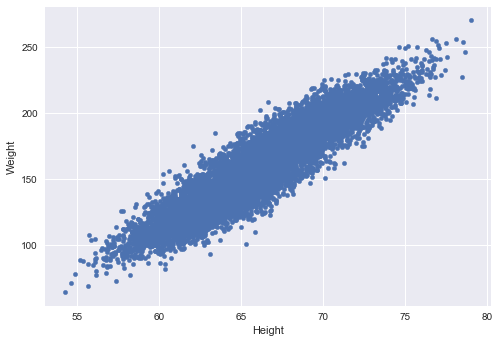

In [5]:
weight_df.plot.scatter(x='Height', y='Weight')

##### What do you think the correlation coefficient is for the above graph?

In [6]:
#calculate correlation coefficient for data

pearsonr(weight_df['Weight'], weight_df['Height'])

(0.9247562987409146, 0.0)

But, what if we want to dig deeper? Not just "these variables are positively correlated" but **how, precisely, does height relate to the weight?**

# Simple Linear Regression: How does it work? 

## Some Vocab

**Regression analysis** is a tool to investigate how independent variables are related to a dependent variable. For example, one may wish to use a person's height, gender, race, etc. to predict a person's weight. 


**Response Variable (Target)**
- Denoted, Y, is also called the target variable  or dependent variable. In the example, weight is the response variable. What we want to predict.

**Predictor Variable (Feature)**
- Denoted, X, is also called the explanatory variable or independent variable. In the example, height is the predictor. What tells us something about the entity we want to predict some attribute of. 


Linear Regression can serve two purposes:

1) It can be a statistical test of the relationship between an independent variable(target) and a dependent variable(feature).  
2) It can create a model that can predict the target value for an observation based on the value of the feature. 

## Setting the stage: Throwback to algebra


Linear regressions model, as you may have guessed, **linear relationships**, but how do we describe those? 

Recall that the equation of a line has the following form:
$$y=mx+b$$

where $m$ is the slope and $b$ is the y-intercept.



<img src="https://mathbitsnotebook.com/JuniorMath/Graphing/slopegraphlabel2.jpg" style="width:400px;" >

Given two points on a line, ($x_1$ and $y_1$) and ($x_2$ and $y_2$) , the slope is calculated by:

\begin{align} m&=\dfrac{y_2-y_1}{x_2-x_1}\\&=\dfrac{\text{change in y}}{\text{change in x}}\\&=\frac{\text{rise}}{\text{run}} \end{align}

## Finally, Linear Regression!

To use known information to provide a better estimate, we need to understand how the dependent and independent variables are related. In statistics, we can **describe how variables are related using a mathematical function. The function along with other assumptions is called a model.**

<img src="https://www.stevejburr.com/post/2019-03-27-scatter-plots-and-best-fit-lines_files/figure-html/unnamed-chunk-2-1.png" width="600" >



The general form of the simple linear regression model is...

$$Y=\beta_0+\beta_1X+\epsilon$$

For an individual observation,

$$y_i=\beta_0+\beta_1x_i+\epsilon_i$$

where,

$\beta_0$ is the population y-intercept,

$\beta_1$ is the population slope, and

$\epsilon_i$ is the error or deviation of $y_i$ from the line, $\beta_0+\beta_1x_i$.

[Deriving the least squares estimators of the slope and intercept (simple linear regression)](https://youtube.com/watch?v=ewnc1cXJmGA)
Essentially, you're minimizing a function --> calculus time! Not super important that you know how _exactly_ this is done.

#### We can finally get into one of our guiding questions now! How do we know which line is best? 

**Spoiler alert: It is the line that minimizes our errors, also called residuals.**

### Residual

$\hat{\epsilon}_i=y_i-\hat{y}_i$ is the observed error, typically called the residual.

<img src="https://cdn.kastatic.org/googleusercontent/Ebu4-AAwd4Z3irAQ9-AVyvA2abB-rb8cvQBjy60N42qD7JcDyd81bvz8DRiX6y2op9w2ryROslzP9OFtJ5PO9i6s" width="400">

#### Think: If you take all of the residuals and sum them, what should they equal?

In order to get an idea of how well our line fits to the data, we sum the squares of the residuals.  

### Least Squares Line

We don't minimize the sum of residuals though! This is what we minimize: 

$$SSR = \sum_{i=1}^n (\hat{y} - \bar{y})^2$$

The least squares line is the line for which the sum of squared errors of predictions for all sample points is the least.

## Fitting a Model in Python

This is why cleaning your data is 80% of your efforts!

A couple things to note:
- New library!
- Formula format: target ~ predictors
- Methods: `.fit()` and `.summary()`
- That's a lot of numbers...

In [8]:
# building a linear regression model using statsmodel 
from statsmodels.formula.api import ols
lr_model = ols(formula='Weight~Height', data=weight_df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:18:56   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -350.7372      2.111   -166.109      0.000    -354.876    -346.598
Height         7.7173      0.032    242.975      0.000       7.655       7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpreting the Model output

### Interpreting the slope of the regression equation,  $\hat{\beta}_1$ 

$\hat{\beta}_1$ represents the estimated increase in $Y$ per unit increase in $X$. Note that the increase may be negative which is reflected when $\hat{\beta}_1$ is negative.

### Interpreting the intercept of the regression equation, $\hat{\beta}_0$

$\hat{\beta}_0$ is the -intercept of the regression line. When $X=0$ is within the scope of observation, $\hat{\beta}_0$ is the estimated value of $Y$ when $X=0$ .

### Your turn #1: Interpret the coefficients in the model summary.

- y-intercept: When your height is 0, your weight is about -350 pounds
    - We'll talk about this weirdness later!
- Height: For each unit increase in height (each additional inch), your weight is estimated to increase by about 7.7 pounds.

### Your turn #2: Can you take the take the output of model summary and use it to rewrite the model with actual values?***

(*In other words, replace the betas with numbers*)

$$\hat{y} = 7.7x - 350$$
"y hat" is another way of saying "the predicted value for y"

### Why is there a p-value for the coefficient?

Let's go back to thinking about linear regression as a way to test if there is a relationship between two variables!

$H_0\colon \beta_1=0$

$H_a\colon \beta_1\ne0$

With this in mind, how would you interpret the p-value for height in this output?

#### answer
p value for height = 0.000, alpha = 0.05

At a significance level of 0.05, we have evidence to suggest that we can reject the null, and say that that there is evidence to suggest that there is some relationship between weight and height.

### More practice!

Now that we have determined the slope and intercept of the line, we can use it to model the relationship between height and weight, and create predictions for our target variable (weight) using values for our explanatory variable (height).

Suppose Jen is 5'7" and weighs 140lbs. 

1. Use this equation to determine what it would predict Jennifer's weight to be.
3. Find the residual of this prediction.

#### Answer

In [8]:
y_hat = 7.7*(5*12 + 7) - 350

error =  140 - y_hat

print('Prediction:', y_hat, 'Residual:', error)

Prediction: 165.89999999999998 Residual: -25.899999999999977


### But what about that R-Squared Value in the output? 

That's the Coefficient of Determination ($R^2$)!

The _coefficient of determination_, is a measure of how well the model fits the data.

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model.
- Baseline model = Naive Model


#### But how is it calculated?

$$\text{TSS }= \text{ESS} + \text{RSS }$$

- TSS or SST = Total Sum of Squares 
- ESS or SSE = Explained Sum of Squares
- RSS or SSR = Residual Sum of Squares


<img src='https://pbs.twimg.com/media/D-Gu7E0WsAANhLY.png' width ="700">

The actual calculation of $R^2$ is: <br/> $$\Large R^2= \frac{\Sigma_i(\bar{y} - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}=1- \frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$$.

$R^2$ takes values between 0 and 1.

$R^2$ is a measure of how much variation in the dependent variable your model explains.

### Caution!

If you see a value $R^2 = 1$, beware! An $R^2$ value of 1 means that there is at least one variable that _perfectly_ explains your target.
- This is bad!
- "Deterministic" relationship - a feature and your target are perfectly correlated, no randomness is present.
- Likely means that you have data leakage.

# Cautions with Linear Regression


1. **Use extrapolation with caution.** 

- Extrapolation is applying a regression model to X-values outside the range of sample X-values to predict values of the response variable.
- Remember that wonky y-intercept? Extrapolation!
- How long can a linear trend really last?

2. **The fact that there is no _linear_ relationship (i.e. correlation is zero) does not imply there is no relationship altogether.** 

The scatter plot will reveal whether other possible relationships may exist. The figure below gives an example where X, Y are related, but not linearly related i.e. the correlation is zero.

<img src='https://statistics.laerd.com/spss-tutorials/img/pc/linear-non-linear.png' width="600">

3. **Outliers and Influential Observations**

Not all outliers are "bad", but influential points are!
> Influential observations are points whose removal causes the regression equation to change considerably.

https://www.desmos.com/calculator/jwquvmikhr

### So why bother? 

**It's so interpretable!!!** It's a data scientist's go-to, despite, or perhaps _because_ of its simplicity.
- Anyone understand exactly how it works
- We know exactly what the model's output is based on
- We can extract insight

The focus should not always be microscopic gains in accuracy.